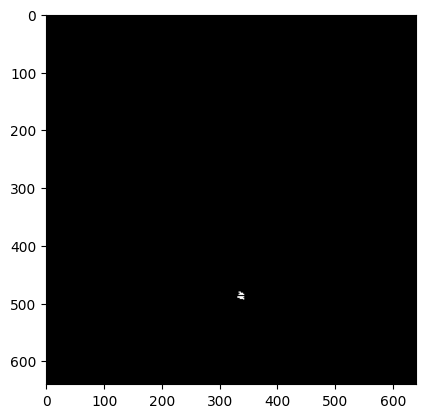

In [2]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path

# # Define the directory structure as described
# base_dirs = {
#     "train": Path("./datasets/data/train"),
#     "val": Path("./datasets/data/val"),
#     "test": Path("./datasets/data/test")
# }

# # Placeholder for the conversion code
# def yolo_to_unet(yolo_annotation, img_dims):
#     """
#     Converts YOLO polygon annotation to UNET segmentation mask.

#     Parameters:
#     - yolo_annotation: a list of strings, each representing one line of YOLO annotation
#     - img_dims: a tuple (width, height) of the image dimensions

#     Returns:
#     - A UNET mask as a numpy array
#     """
#     # Create an empty mask with the same dimensions as the original image
#     unet_mask = np.zeros(img_dims, dtype=np.uint8)

#     # For each line in the YOLO annotation, convert coordinates and draw the polygon
#     for line in yolo_annotation:
#         # Split the line into parts and remove the class label (first element)
#         parts = line.strip().split()[1:]
#         # Convert the normalized coordinates to pixel coordinates
#         points = np.array([float(p) for p in parts]).reshape(-1, 2)
#         points[:, 0] *= img_dims[0]  # x coordinates
#         points[:, 1] *= img_dims[1]  # y coordinates
#         points = points.astype(np.int32)  # Convert to int for drawing

#         # Draw the polygon on the mask, 255 indicates the object
#         cv2.fillPoly(unet_mask, [points], color=255)

#     return unet_mask

# # Example usage
# # Assume we're dealing with 'train' data
# yolo_annotations = base_dirs['train'].joinpath('labels/01016SACH_seg1_055.txt').read_text().strip().split('\n')
# unet_mask = yolo_to_unet(yolo_annotations, img_dims=(640, 640))

# # Display the resulting mask
# plt.imshow(unet_mask, cmap='gray')
# plt.show()



In [4]:
# import cv2
# import numpy as np
# from pathlib import Path

# def yolo_to_unet(yolo_annotation, img_dims):
#     """
#     Converts YOLO polygon annotation to UNET segmentation mask.

#     Parameters:
#     - yolo_annotation: a list of strings, each representing one line of YOLO annotation
#     - img_dims: a tuple (width, height) of the image dimensions

#     Returns:
#     - A UNET mask as a numpy array
#     """
#     # Create an empty mask with the same dimensions as the original image
#     unet_mask = np.zeros(img_dims, dtype=np.uint8)

#     for line in yolo_annotation:
#         try:
#             # Split the line into parts and remove the class label (first element)
#             parts = line.strip().split()[1:]
#             # Convert the normalized coordinates to pixel coordinates
#             points = np.array([float(p) for p in parts]).reshape(-1, 2)
#             points[:, 0] = np.clip(points[:, 0] * img_dims[1], 0, img_dims[1] - 1)  # x coordinates
#             points[:, 1] = np.clip(points[:, 1] * img_dims[0], 0, img_dims[0] - 1)  # y coordinates
#             points = points.astype(np.int32)  # Convert to int for drawing
#             if len(points) < 3:
#                 # Need at least 3 points to form a polygon
#                 continue
#             # Draw the polygon on the mask, 255 indicates the object
#             cv2.fillPoly(unet_mask, [points], color=255)
#         except Exception as e:
#             print(f"An error occurred while processing the line: {line}")
#             print(f"Error: {e}")
#             continue

#     return unet_mask


# # Define the directory structure
# base_dirs = {
#     "train": Path("./datasets/data/train"),
#     "val": Path("./datasets/data/val"),
#     "test": Path("./datasets/data/test")
# }

# # Define the image dimensions
# img_dims = (640, 640)

# # Example usage for one image
# image_id = "01016SACH_seg1_055"
# yolo_annotation_path = base_dirs['train'].joinpath(f'labels/{image_id}.txt')
# yolo_annotations = yolo_annotation_path.read_text().strip().split('\n')
# unet_mask = yolo_to_unet(yolo_annotations, img_dims)

# # Save the UNET mask to a file
# unet_mask_path = base_dirs['train'].joinpath(f'labels/{image_id}_mask.png')
# cv2.imwrite(str(unet_mask_path), unet_mask)


True

In [5]:
# import os

# # Define the base directory for YOLO annotations and the target directory for UNET masks
# base_dir = Path("./datasets/data")
# unet_dir = base_dir / "datasets_unet"

# # Create the UNET directory if it does not exist
# unet_dir.mkdir(parents=True, exist_ok=True)

# def convert_and_save_all(base_dir, unet_dir, img_dims=(640, 640)):
#     """
#     Convert all YOLO annotations in the given base directory to UNET masks and save them in the unet_dir.
#     """
#     # Define the subdirectories for 'train', 'val', and 'test'
#     subsets = ['train', 'val', 'test']
    
#     for subset in subsets:
#         # Define paths to the images and labels
#         images_path = base_dir / subset / 'images'
#         labels_path = base_dir / subset / 'labels'
        
#         # List all label files
#         label_files = [f for f in labels_path.glob('*.txt') if f.is_file()]
        
#         # Process each label file
#         for label_file in label_files:
#             # Read YOLO annotations from the file
#             yolo_annotations = label_file.read_text().strip().split('\n')
            
#             # Convert YOLO annotations to UNET mask
#             unet_mask = yolo_to_unet(yolo_annotations, img_dims)
            
#             # Define the corresponding UNET mask file path
#             unet_mask_path = unet_dir / subset / 'masks' / f"{label_file.stem}_mask.png"
            
#             # Create the directory for the subset and masks if it does not exist
#             unet_mask_path.parent.mkdir(parents=True, exist_ok=True)
            
#             # Save the UNET mask to a file
#             cv2.imwrite(str(unet_mask_path), unet_mask)
            
#             # Optional: Copy the image to the UNET directory to keep the structure similar
#             src_image_path = images_path / f"{label_file.stem}.png"
#             target_image_path = unet_dir / subset / 'images' / src_image_path.name
#             target_image_path.parent.mkdir(parents=True, exist_ok=True)
#             # Copy image file
#             os.system(f"cp {src_image_path} {target_image_path}")

# # Call the function to convert and save all annotations
# convert_and_save_all(base_dir, unet_dir)


In [7]:
# import shutil
# from pathlib import Path

# def copy_images_to_unet_dir(base_dir, unet_dir, subsets=['train', 'val', 'test']):
#     """
#     Copy the original images from the YOLO dataset to the UNET dataset directory.
    
#     Parameters:
#     - base_dir: Path object of the base directory where YOLO dataset is stored.
#     - unet_dir: Path object of the target directory for UNET dataset.
#     - subsets: list of subdirectory names for 'train', 'val', and 'test' sets.
#     """
#     for subset in subsets:
#         # Define paths to the source images and target images directory
#         source_images_path = base_dir / subset / 'images'
#         target_images_path = unet_dir / subset / 'images'
        
#         # Create the target images directory if it does not exist
#         target_images_path.mkdir(parents=True, exist_ok=True)
        
#         # Copy all image files from source to target directory
#         for image_file in source_images_path.glob('*.png'):
#             target_image_file = target_images_path / image_file.name
#             # Use shutil.copy to copy files
#             shutil.copy(str(image_file), str(target_image_file))

# # Example usage
# base_dir = Path('./datasets/data')  # Replace with the path to your YOLO dataset
# unet_dir = base_dir / 'datasets_unet'  # Replace with your desired UNET dataset directory
# copy_images_to_unet_dir(base_dir, unet_dir)


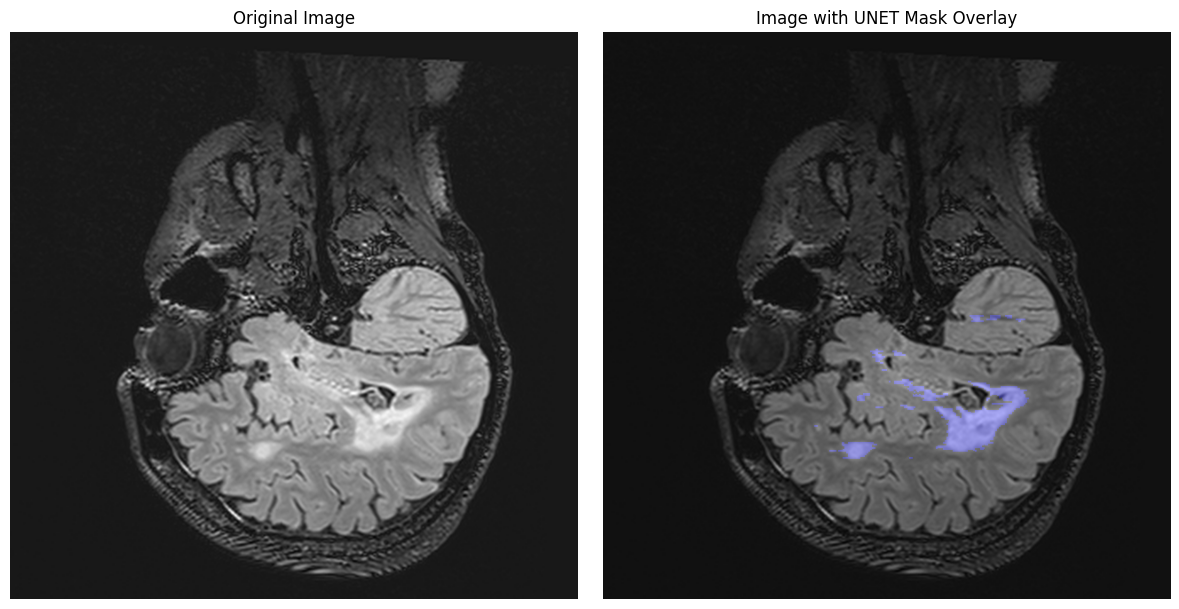

In [15]:
# Redefine the image paths with the actual file paths
image_path = './datasets/data/datasets_unet/train/images/01016SACH_seg1_086.png'
mask_path = './datasets/data/datasets_unet/train/masks/01016SACH_seg1_086_mask.png'

# image_path = './datasets/data/datasets_unet/train/images/01016SACH_seg1_057.png'
# mask_path = './datasets/data/datasets_unet/train/masks/01016SACH_seg1_057_mask.png'

def overlay_mask_on_image(image, mask):
    """
    Overlays the UNET mask on the original image.

    Parameters:
    - image: the original image as a numpy array
    - mask: the UNET mask as a numpy array

    Returns:
    - The original image with the UNET mask overlaid as a numpy array
    """
    # Convert mask to a 3 channel image so it can be colored
    colored_mask = np.zeros_like(image)
    # We use red color (in RGB) to overlay the mask
    colored_mask[mask == 255] = [255, 0, 0]

    # Overlay the colored mask on the image with some transparency
    overlayed_image = cv2.addWeighted(image, 0.7, colored_mask, 0.3, 0)

    return overlayed_image

# Read the image and mask files
image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Check if the files were loaded correctly
if image is None or mask is None:
    print("Error loading image or mask.")
else:
    # Overlay mask on image
    overlayed_image = overlay_mask_on_image(image, mask)

    # Display the original image and the image with mask overlay
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Image with UNET Mask Overlay')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()